# Go faster with Numba and Cython

In [45]:
def polyn(n):
    total = 0
    for i in range(n):
        total += (7*n*n) + (-3*n) + 42
    return total

In [46]:
ntimes = 10000
%timeit -n $ntimes polyn(1000)

300 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
import numba

In [48]:
@numba.jit
def polyn(n):
    total = 0
    for i in range(n):
        total += (7*n*n) + (-3*n) + 42
    return total

In [49]:
%timeit -n $ntimes polyn(1000)

The slowest run took 35.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1.18 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
%load_ext cython

In [51]:
%%cython
def ployn(int n):
    cdef int total = 0
    cdef i
    
    for i in range(n):
        total += (7*n*n) + (-3*n) + 42
    return total

In [52]:
%timeit -n $ntimes polyn(1000)

216 ns ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [53]:
%%cython
from libc.math cimport hypot

def dist(double x1, double y1, double x2, double y2):
    cdef double dx = abs(x1 - x2)
    cdef double dy = abs(y1 - y2)
    return hypot(dx, dy)

In [54]:
dist(1,1, 2,2)

1.4142135623730951

In [55]:
from scipy.spatial.distance import euclidean
euclidean([1,1], [2,2])

1.4142135623730951

# Understand deep learning

In [56]:
from sklearn.datasets import load_digits

In [57]:
digits = load_digits()

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

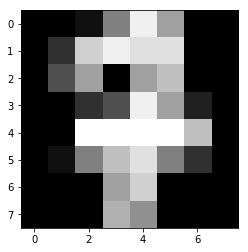

In [59]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [60]:
digits['target'][idx]

7

In [61]:
digits['images'].shape

(1797, 8, 8)

In [62]:
digits['data'].shape

(1797, 64)

In [63]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [64]:
X = digits['data']
y = digits['target']

In [65]:
y = np_utils.to_categorical(y)

In [66]:
y[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [70]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.fit(X_train, y_train)

Epoch 1/10
1257/1257 [==============================] - 0s - loss: 2.2351 - acc: 0.1066     
Epoch 2/10
1257/1257 [==============================] - 0s - loss: 1.7032 - acc: 0.1631     
Epoch 3/10
1257/1257 [==============================] - 0s - loss: 1.0669 - acc: 0.2888     
Epoch 4/10
1257/1257 [==============================] - 0s - loss: 0.2925 - acc: 0.9045     
Epoch 5/10
1257/1257 [==============================] - 0s - loss: 0.1233 - acc: 0.9634     
Epoch 6/10
1257/1257 [==============================] - 0s - loss: 0.0762 - acc: 0.9753     
Epoch 7/10
1257/1257 [==============================] - 0s - loss: 0.0457 - acc: 0.9889     
Epoch 8/10
1257/1257 [==============================] - 0s - loss: 0.0292 - acc: 0.9936     
Epoch 9/10
1257/1257 [==============================] - 0s - loss: 0.0324 - acc: 0.9928     
Epoch 10/10
1257/1257 [==============================] - 0s - loss: 0.0216 - acc: 0.9960     


In [72]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

 32/540 [>.............................] - ETA: 0s

0.95740740829043913

In [73]:
model.predict(X_test[:3])

array([[  9.45310148e-07,   2.48657067e-10,   6.66614652e-10,
          1.09922155e-06,   3.06053480e-05,   9.33934189e-06,
          3.09134107e-11,   8.95367266e-05,   5.46174988e-06,
          7.53236771e-01],
       [  2.09083532e-06,   8.57935305e-08,   4.95928134e-07,
          9.78475190e-10,   2.13303338e-06,   2.84330622e-06,
          6.33754134e-01,   2.94521074e-09,   5.17823310e-06,
          7.74857717e-13],
       [  9.86624116e-09,   8.02790237e-06,   9.74509418e-01,
          1.13350630e-03,   2.24895894e-10,   3.88966592e-09,
          9.64743285e-10,   8.42748761e-07,   3.39880921e-06,
          1.50476335e-05]], dtype=float32)

In [74]:
model.predict(X_test[:3]).argmax(axis=1)

array([9, 6, 2])

In [75]:
y_test[:3].argmax(axis=1)

array([9, 6, 2])

In [76]:
model.save('digits.h5')

In [77]:
from keras.models import load_model
model1 = load_model('digits.h5')

In [78]:
model1.predict(X_test[:3]).argmax(axis=1)

array([9, 6, 2])

# Work with image processing

In [79]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [80]:
img = cv2.imread('coffee.jpg')

NameError: name 'cv2' is not defined

In [ ]:
type(img)

In [ ]:
img.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
plt.imshow(gray, cmap=plt.cm.gray)

In [ ]:
edges = cv2.Canny(gray, 200, 300)

In [ ]:
plt.imshow(edges, cmap=plt.cm.gray)

In [ ]:
img = cv2.imread('child.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
import sys
fname = '{}/share/OpenCV/haarcascades/haarcascade_frontalcatface.xml'.format(sys.prefix)
model = cv2.CascadeClassifier(fname)

In [ ]:
faces = model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(500, 500))

In [ ]:
faces

In [ ]:
img = cv2.imread('child.jpg')
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 50)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Understand NLP: NLTK

In [ ]:
from os import path

In [ ]:
fname = path.expanduser('~/nltk_data/corpora/abc/science.txt')
with open(fname, 'rb') as fp:
    data = fp.read().decode(errors='replace')

In [ ]:
articles = data.split('\r\n\r\n')
article = articles[0]
print(article)

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
sents = sent_tokenize(article)
print(sents[0])

In [ ]:
from nltk.corpus import stopwords
import re

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
def is_ok(token):
    return re.match('^[a-z]+$', token) and token not in stop

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(sent):
    return [word for word in word_tokenize(sent.lower()) if is_ok(word)]

In [ ]:
from collections import Counter

In [ ]:
def summarize(text, n=3):
    sents = sent_tokenize(text)
    bow = [tokenize(sent) for sent in sents]
    tf = Counter()
    for sent in bow:
        tf.update(sent)
        
    def score(i):
        return sum(tf[word] for word in bow[i])
    
    idx = sorted(range(len(bow)), key=score, reverse=True)[:n]
    return [sents[i] for i in idx]

In [ ]:
summarize(articles[0])

# Understand NLP: SpaCy

In [ ]:
from os import path

In [ ]:
fname = path.expanduser('~/nltk_data/corpora/abc/science.txt')
with open(fname, 'rb') as fp:
    data = fp.read().decode(errors='replace')

In [ ]:
articles = data.split('\r\n\r\n')
article = articles[0]
print(article)

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
sents = sent_tokenize(article)
print(sents[0])

In [ ]:
from nltk.corpus import stopwords
import re

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
def is_ok(token):
    return re.match('^[a-z]+$', token) and token not in stop

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(sent):
    return [word for word in word_tokenize(sent.lower()) if is_ok(word)]

In [ ]:
from collections import Counter

In [ ]:
def summarize(text, n=3):
    sents = sent_tokenize(text)
    bow = [tokenize(sent) for sent in sents]
    tf = Counter()
    for sent in bow:
        tf.update(sent)
        
    def score(i):
        return sum(tf[word] for word in bow[i])
    
    idx = sorted(range(len(bow)), key=score, reverse=True)[:n]
    return [sents[i] for i in idx]

In [ ]:
summarize(articles[0])

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
fname = path.expanduser('~/nltk_data/corpora/inaugural/1993-Clinton.txt')
with open(fname) as fp:
    data = fp.read()

In [ ]:
doc = nlp(data)

In [ ]:
sent = next(doc.sents)
print(sent)

In [ ]:
for tok in sent:
    print('{} -> {}'.format(tok, tok.ent_type_))

In [ ]:
for ent in doc.ents[:10]:
    print('{} -> {}'.format(ent.string, ent.label_))

In [ ]:
[ent for ent in doc.ents if ent.label == spacy.symbols.PERSON]

# Bigger data with HDF5 and dask

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('taxi.csv.bz2', usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])

In [ ]:
store = pd.HDFStore('taxi.h5')

In [ ]:
store.append('taxi', df, data_columns=['VendorID'])

In [ ]:
store

In [ ]:
df1 = store.select('taxi', 'VendorID==1')

In [ ]:
df1['VendorID'].unique()

In [ ]:
import dask.dataframe as dd

In [ ]:
df = dd.read_csv('taxi-split/*.csv', 
                 usecols=np.arange(21), parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])

In [ ]:
vc = df['VendorID'].value_counts()
vc

In [ ]:
vc.compute()

In [ ]:
vnd = df.groupby('VendorID')
ta = vnd['Total_amount']
m = ta.mean()

In [ ]:
m.compute()